# Import all the libraries

In [4]:
!conda install -c anaconda beautifulsoup4 --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    soupsieve-2.0              |             py_0          33 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    certifi-2019.11.28         |           py36_1         157 KB  anaconda
    beautifulsoup4-4.8.2       |           py36_0         161 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

    soupsieve:      2.0-py_0          an

In [5]:
!conda install -c conda-forge geopy --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The fo

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.24.2              |   py36hf484d3e_0        11.1 MB  conda-forge
    requests-2.23.0            |     pyh8c360ce_2          47 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    jsonschema-3.2.0           |   py36h9f0ad1d_1          89 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    toolz-0.10.0               |             py_0   

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
from bs4 import BeautifulSoup

In [8]:
import json
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import xml
import folium 


print('Libraries imported.')

Libraries imported.


# Read save dataframe from part 2

In [11]:
df2 = pd.read_csv("df_week3_part2.csv",index_col=0)
df2.head()

PostalCode           Borough                                  Neighborhood  \
0        M3A        North York                                     Parkwoods   
1        M4A        North York                              Victoria Village   
2        M5A  Downtown Toronto                    Regent Park / Harbourfront   
3        M6A        North York             Lawrence Manor / Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

# Get neighbourhoods with word Toronto

In [12]:
toronto_df=df2[df2.Borough.str.contains('Toronto')]
toronto_df

PostalCode           Borough  \
2          M5A  Downtown Toronto   
4          M7A  Downtown Toronto   
9          M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
54         M4M      East Toronto   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   

                                          Neighborhood   Latitude  Longitude  
2                           Regent Park / Harbourfront  43.654260 -79.360636  
4         Queen's Park / Ontario Provincial Government  43.662301 -79.389494  
9                             Garden District, Ryerson  43.657162 -79.378937  
15                                      St. James Town  43.651494 -79.375418  
19                                         The Beaches  43.676357 -79.293031  
20                                         Berczy Park  43.644771 -79.373306  
24                                  Central Bay Street  43.657952 -79.387383  
25                                            Christie  43.669542 -79.422564  
30                          Richmond / Adelaide / King  43.650571 -79.384568  
31                       Dufferin / Dovercourt Village  43.669005 -79.442259  
36   Harbourfront East / Union Station / Toronto Is...  43.640816 -79.381752  
37                           Little Portugal / Trinity  43.647927 -79.419750  
41                       The Danforth West / Riverdale  43.679557 -79.352188  
42           Toronto Dominion Centre / Design Exchange  43.647177 -79.381576  
43      Brockton / Parkdale Village / Exhibition Place  43.636847 -79.428191  
47                     India Bazaar / The Beaches West  43.668999 -79.315572  
48                     Commerce Court / Victoria Hotel  43.648198 -79.379817  
54                                     Studio District  43.659526 -79.340923  
61                                       Lawrence Park  43.728020 -79.388790  
62                                            Roselawn  43.711695 -79.416936  
67                                    Davisville North  43.712751 -79.390197  
68                            Forest Hill North & West  43.696948 -79.411307  
69                      High Park / The Junction South  43.661608 -79.464763  
73                                  North Toronto West  43.715383 -79.405678  
74               The Annex / North Midtown / Yorkville  43.672710 -79.405678  
75                             Parkdale / Roncesvalles  43.648960 -79.456325  
79                                          Davisville  43.704324 -79.388790  
80                     University of Toronto / Harbord  43.662696 -79.400049  
81                                 Runnymede / Swansea  43.651571 -79.484450  
83                        Moore Park / Summerhill East  43.689574 -79.383160  
84         Kensington Market / Chinatown / Grange Park  43.653206 -79.400049  
86   Summerhill West / Rathnelly / 

In [14]:
toronto_df.shape

(39, 5)

# Geopy for lat long

In [15]:
address = 'Toronto'

geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


# Create a map of toronto using Folium

In [20]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [54]:
from IPython.display import Image
from IPython.core.display import HTML 

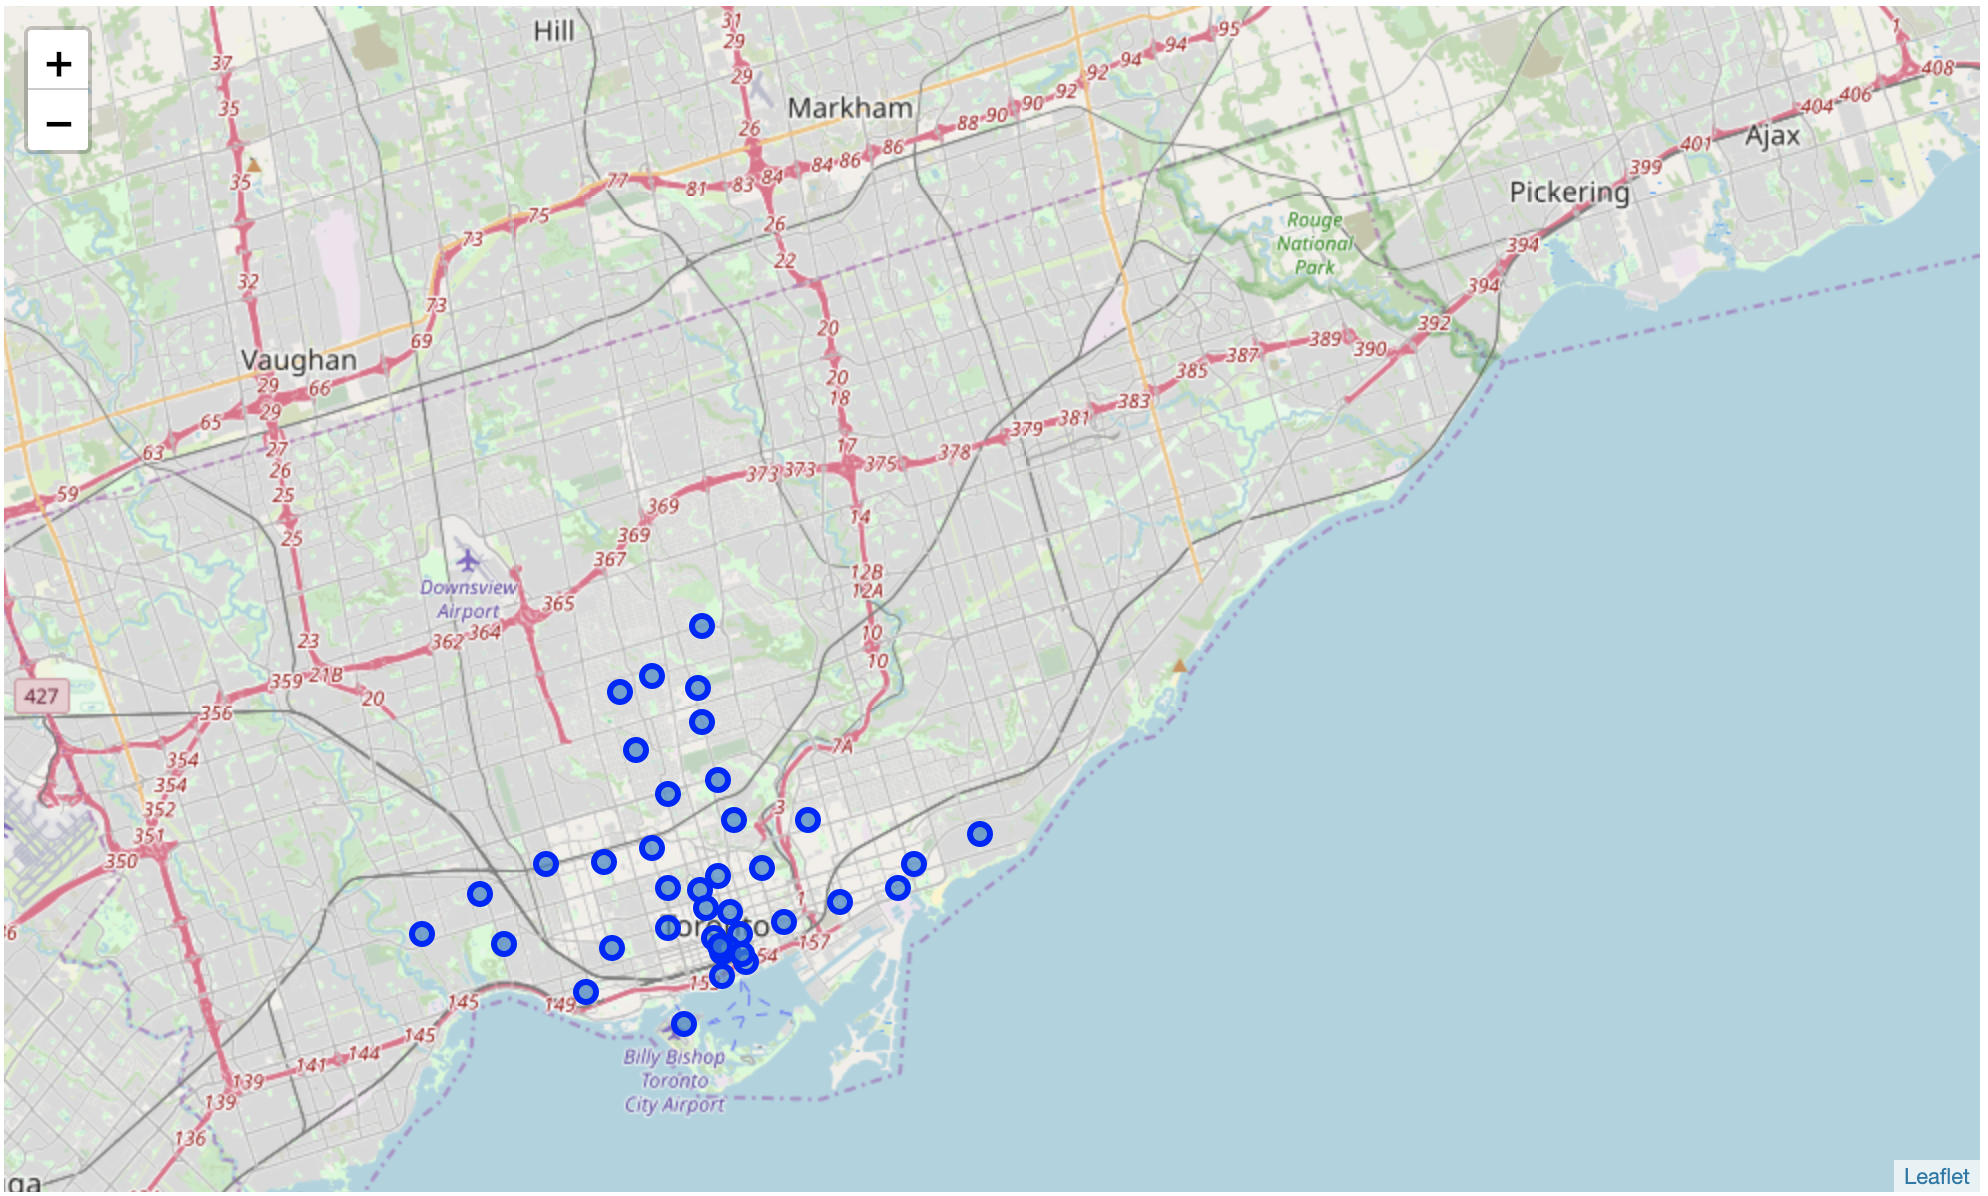

In [56]:
Image(filename = "ss1.png")

# Foursquare Details

In [22]:
CLIENT_ID = 'RRASUCLEYDRO4ZOCHZJXWEJQE0CIOGPQOIGR2IYSQCKDVIY2' # your Foursquare ID
CLIENT_SECRET = 'VSTG5FLZDLF532ULJV0F5Z45BYQD3A1Q2XKXHZ4AN4SWLYLR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RRASUCLEYDRO4ZOCHZJXWEJQE0CIOGPQOIGR2IYSQCKDVIY2
CLIENT_SECRET:VSTG5FLZDLF532ULJV0F5Z45BYQD3A1Q2XKXHZ4AN4SWLYLR


# Venues function

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Toronto venues

In [25]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude'])

Regent Park / Harbourfront
Queen's Park / Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
The Danforth West / Riverdale
Toronto Dominion Centre / Design Exchange
Brockton / Parkdale Village / Exhibition Place
India Bazaar / The Beaches West
Commerce Court / Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park / The Junction South
North Toronto West
The Annex / North Midtown / Yorkville
Parkdale / Roncesvalles
Davisville
University of Toronto / Harbord
Runnymede / Swansea
Moore Park / Summerhill East
Kensington Market / Chinatown / Grange Park
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Roseda

In [26]:
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (toronto_venues.shape,toronto_venues.shape[0]))
toronto_venues.head()

The shape of the dataframe is (1681, 7). The dataset has 1681 rows.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park / Harbourfront               43.65426              -79.360636   
1  Regent Park / Harbourfront               43.65426              -79.360636   
2  Regent Park / Harbourfront               43.65426              -79.360636   
3  Regent Park / Harbourfront               43.65426              -79.360636   
4  Regent Park / Harbourfront               43.65426              -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0        Roselle Desserts       43.653447       -79.362017   
1           Tandem Coffee       43.653559       -79.361809   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3     Body Blitz Spa East       43.654735       -79.359874   
4      Morning Glory Cafe       43.653947       -79.361149   

        Venue Category  
0               Bakery  
1          Coffee Shop  
2  Distribution Center  
3                  Spa  
4       Breakfast Spot

In [27]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            55   
Brockton / Parkdale Village / Exhibition Place                         22   
Business reply mail Processing CentrE                                  16   
CN Tower / King and Spadina / Railway Lands / H...                     16   
Central Bay Street                                                     77   
Christie                                                               19   
Church and Wellesley                                                   79   
Commerce Court / Victoria Hotel                                       100   
Davisville                                                             36   
Davisville North                                                        8   
Dufferin / Dovercourt Village                                          16   
First Canadian Place / Underground city                               100   
Forest Hill North & West                                                4   
Garden District, Ryerson                                              100   
Harbourfront East / Union Station / Toronto Isl...                    100   
High Park / The Junction South                                         24   
India Bazaar / The Beaches West                                        21   
Kensington Market / Chinatown / Grange Park                            76   
Lawrence Park                                                           4   
Little Portugal / Trinity                                              50   
Moore Park / Summerhill East                                            2   
North Toronto West                                                     17   
Parkdale / Roncesvalles                                                13   
Queen's Park / Ontario Provincial Government                           32   
Regent Park / Harbourfront                                             45   
Richmond / Adelaide / King                                            100   
Rosedale                                                                4   
Roselawn                                                                3   
Runnymede / Swansea                                                    40   
St. James Town                                                        100   
St. James Town / Cabbagetown                                           47   
Stn A PO Boxes                                                         95   
Studio District                                                        42   
Summerhill West / Rathnelly / South Hill / Fore...                     15   
The Annex / North Midtown / Yorkville                                  21   
The Beaches                                                             5   
The Danforth West / Riverdale                                          42   
Toronto Dominion Centre / Design Exchange                             100   
University of Toronto / Harbord                                        35   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             55   
Brockton / Parkdale Village / Exhibition Place                          22   
Business reply mail Processing CentrE                                   16   
CN Tower / King and Spadina / Railway Lands / H...                      16   
Central Bay Street                                                      77   
Christie                                                                19   
Church and Wellesley                                                    79   
Commerce Court / Victoria Hotel                                        100   
Davisville                                                              36   
Davisville North                    

In [40]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood']=toronto_venues['Neighborhood']
# Note: In the lab, the column name in the dummy variale df is the same as the one in no-dv df. Here it won't work.
#       Column names must be different.

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

# check the number of rows. It must be equal to that of toronto_venues
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (toronto_onehot.shape,toronto_onehot.shape[0]))

# print top 5 rows
toronto_onehot.head()

The shape of the dataframe is (1681, 236). The dataset has 1681 rows.


Neighbourhood  Afghan Restaurant  Airport  Airport Food Court  \
0  Regent Park / Harbourfront                  0        0                   0   
1  Regent Park / Harbourfront                  0        0                   0   
2  Regent Park / Harbourfront                  0        0                   0   
3  Regent Park / Harbourfront                  0        0                   0   
4  Regent Park / Harbourfront                  0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0             0               0                0                 0   
1             0               0                0                 0   
2             0               0                0                 0   
3             0               0                0                 0   
4             0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                    0             0         0            0   
1                    0             0         0            0   
2                    0             0         0            0   
3                    0             0         0            0   
4                    0             0         0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                    0                 0                   0              0   
1                    0                 0                   0              0   
2                    0                 0                   0              0   
3                    0                 0                   0              0   
4                    0                 0                   0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  \
0          0           0           0       1     0    0                 0   
1          0           0           0       0     0    0                 0   
2          0           0           0       0     0    0                 0   
3          0           0           0       0     0    0                 0   
4          0           0           0       0     0    0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0       0              0          0         0   
1                   0       0              0          0         0   
2                   0       0              0          0         0   
3                   0       0              0          0         0   
4                   0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                     0               0        0                0         0   
1                     0               0        0                0         0   
2                     0               0        0                0         0   
3                     0               0        0                0         0   
4                     0               1        0                0         0   

   Burger Joint  Burrito Place  Bus Line  Business Service  Butcher  Café  \
0             0              0         0                 0        0     0   
1             0              0         0                 0        0     0   
2             0              0         0                 0        0     0   
3             0              0         0                 0        0     0   
4             0              0         0                 0        0     0   

   Cajun / 

In [41]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()

# Check the shape of toronto_grouped. The number of rows is equal to that of toronto_data (both are grouped by neighborhood)
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (toronto_grouped.shape,toronto_grouped.shape[0]))

# Print the top 5 rows
toronto_grouped.head()
# Note: The sum of all column values for each row is 1 (100%). The number in each cell represents relative frequency

The shape of the dataframe is (39, 236). The dataset has 39 rows.


Neighbourhood  Afghan Restaurant  \
0                                        Berczy Park                0.0   
1     Brockton / Parkdale Village / Exhibition Place                0.0   
2              Business reply mail Processing CentrE                0.0   
3  CN Tower / King and Spadina / Railway Lands / ...                0.0   
4                                 Central Bay Street                0.0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0   0.0000              0.0000        0.0000           0.000            0.000   
1   0.0000              0.0000        0.0000           0.000            0.000   
2   0.0000              0.0000        0.0000           0.000            0.000   
3   0.0625              0.0625        0.0625           0.125            0.125   
4   0.0000              0.0000        0.0000           0.000            0.000   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0             0.000             0.000000           0.0       0.0     0.018182   
1             0.000             0.000000           0.0       0.0     0.000000   
2             0.000             0.000000           0.0       0.0     0.000000   
3             0.125             0.000000           0.0       0.0     0.000000   
4             0.000             0.012987           0.0       0.0     0.000000   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                  0.0               0.0                 0.0         0.0000   
1                  0.0               0.0                 0.0         0.0000   
2                  0.0               0.0                 0.0         0.0625   
3                  0.0               0.0                 0.0         0.0000   
4                  0.0               0.0                 0.0         0.0000   

   BBQ Joint  Baby Store  Bagel Shop    Bakery  Bank       Bar  \
0   0.018182         0.0    0.018182  0.036364   0.0  0.000000   
1   0.000000         0.0    0.000000  0.045455   0.0  0.045455   
2   0.000000         0.0    0.000000  0.000000   0.0  0.000000   
3   0.000000         0.0    0.000000  0.000000   0.0  0.062500   
4   0.000000         0.0    0.000000  0.000000   0.0  0.012987   

   Baseball Stadium  Basketball Stadium     Beach  Bed & Breakfast  Beer Bar  \
0               0.0            0.018182  0.018182              0.0  0.036364   
1               0.0            0.000000  0.000000              0.0  0.000000   
2               0.0            0.000000  0.000000              0.0  0.000000   
3               0.0            0.000000  0.000000              0.0  0.000000   
4               0.0            0.000000  0.000000              0.0  0.000000   

   Beer Store  Belgian Restaurant    Bistro  Boat or Ferry  Bookstore  \
0         0.0                 0.0  0.018182         0.0000   0.000000   
1         0.0                 0.0  0.000000         0.0000   0.000000   
2         0.0                 0.0  0.000000         0.0000   0.000000   
3         0.0                 0.0  0.000000         0.0625   0.000000   
4         0.0                 0.0  0.000000         0.0000   0.012987   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0    0.0000                   0.0        0.018182   0.0000         0.000000   
1    0.0000                   0.0        0.090909   0.0000         0.000000   
2    0.0000                   0.0        0.000000   0.0625         0.000000   
3    0.0625                   0.0        0.000000   0.0000         0.000000   
4    0.0000                   0.0        0.000000   0.0000         0.025974   

   Building  Burger Joint  Burrito Place  Bus Line  Business Service  \
0       0.0      0.000000       0.000000       0.0          0.000000   
1       0.0      0.000000       0.045455       0.0          0.000000   
2       0.0      0.000000       0.062500       0.0          0.000000   
3       0.0      0.000000       0.000000       0.0         

# Clustering

In [42]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 3, 2,
       2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [44]:
toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)



In [45]:
# Left join
toronto_merged=pd.merge(toronto_df,toronto_grouped,how='left',left_on='Neighborhood',right_on='Neighbourhood')


In [46]:

# Delete duplicate neighborhood column
toronto_merged.drop(['Neighbourhood'],axis=1,inplace=True)


In [47]:

# Rename column
toronto_merged.rename(columns={'Neighborhood_x':'Neighborhood'},inplace=True)


In [48]:

# Check top 5 rows
toronto_merged.head()

PostalCode           Borough                                  Neighborhood  \
0        M5A  Downtown Toronto                    Regent Park / Harbourfront   
1        M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government   
2        M5B  Downtown Toronto                      Garden District, Ryerson   
3        M5C  Downtown Toronto                                St. James Town   
4        M4E      East Toronto                                   The Beaches   

    Latitude  Longitude  Cluster Labels  Afghan Restaurant  Airport  \
0  43.654260 -79.360636               2                0.0      0.0   
1  43.662301 -79.389494               2                0.0      0.0   
2  43.657162 -79.378937               2                0.0      0.0   
3  43.651494 -79.375418               2                0.0      0.0   
4  43.676357 -79.293031               2                0.0      0.0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                 0.0           0.0             0.0              0.0   
1                 0.0           0.0             0.0              0.0   
2                 0.0           0.0             0.0              0.0   
3                 0.0           0.0             0.0              0.0   
4                 0.0           0.0             0.0              0.0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0               0.0                 0.00      0.022222       0.0         0.00   
1               0.0                 0.00      0.000000       0.0         0.00   
2               0.0                 0.01      0.000000       0.0         0.01   
3               0.0                 0.03      0.000000       0.0         0.01   
4               0.0                 0.00      0.000000       0.0         0.00   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0              0.00000          0.022222                 0.0            0.0   
1              0.03125          0.000000                 0.0            0.0   
2              0.00000          0.000000                 0.0            0.0   
3              0.00000          0.010000                 0.0            0.0   
4              0.00000          0.000000                 0.0            0.0   

   BBQ Joint  Baby Store  Bagel Shop    Bakery      Bank      Bar  \
0       0.00         0.0         0.0  0.066667  0.022222  0.00000   
1       0.00         0.0         0.0  0.000000  0.031250  0.03125   
2       0.00         0.0         0.0  0.010000  0.010000  0.01000   
3       0.02         0.0         0.0  0.030000  0.000000  0.00000   
4       0.00         0.0         0.0  0.000000  0.000000  0.00000   

   Baseball Stadium  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0   0.00000   
1               0.0                 0.0    0.0              0.0   0.03125   
2               0.0                 0.0    0.0              0.0   0.01000   
3               0.0                 0.0    0.0              0.0   0.03000   
4               0.0                 0.0    0.0              0.0   0.00000   

   Beer Store  Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0    0.022222                0.00    0.00            0.0       0.00   0.00000   
1    0.000000                0.00    0.00            0.0       0.00   0.03125   
2    0.000000                0.00    0.00            0.0       0.02   0.00000   
3    0.000000                0.01    0.01            0.0       0.02   0.00000   
4    0.000000                0.00    0.00            0.0       0.00   0.00000   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0        0.044444      0.0             0.00       0.0   
1                   0.0        0.000000      0.0             0.00       0.0   
2                   0.0        0.000000      0.0             0.03       0.0   
3                 

In [50]:
toronto_merged.shape

(39, 241)

# Cluster visualization

In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

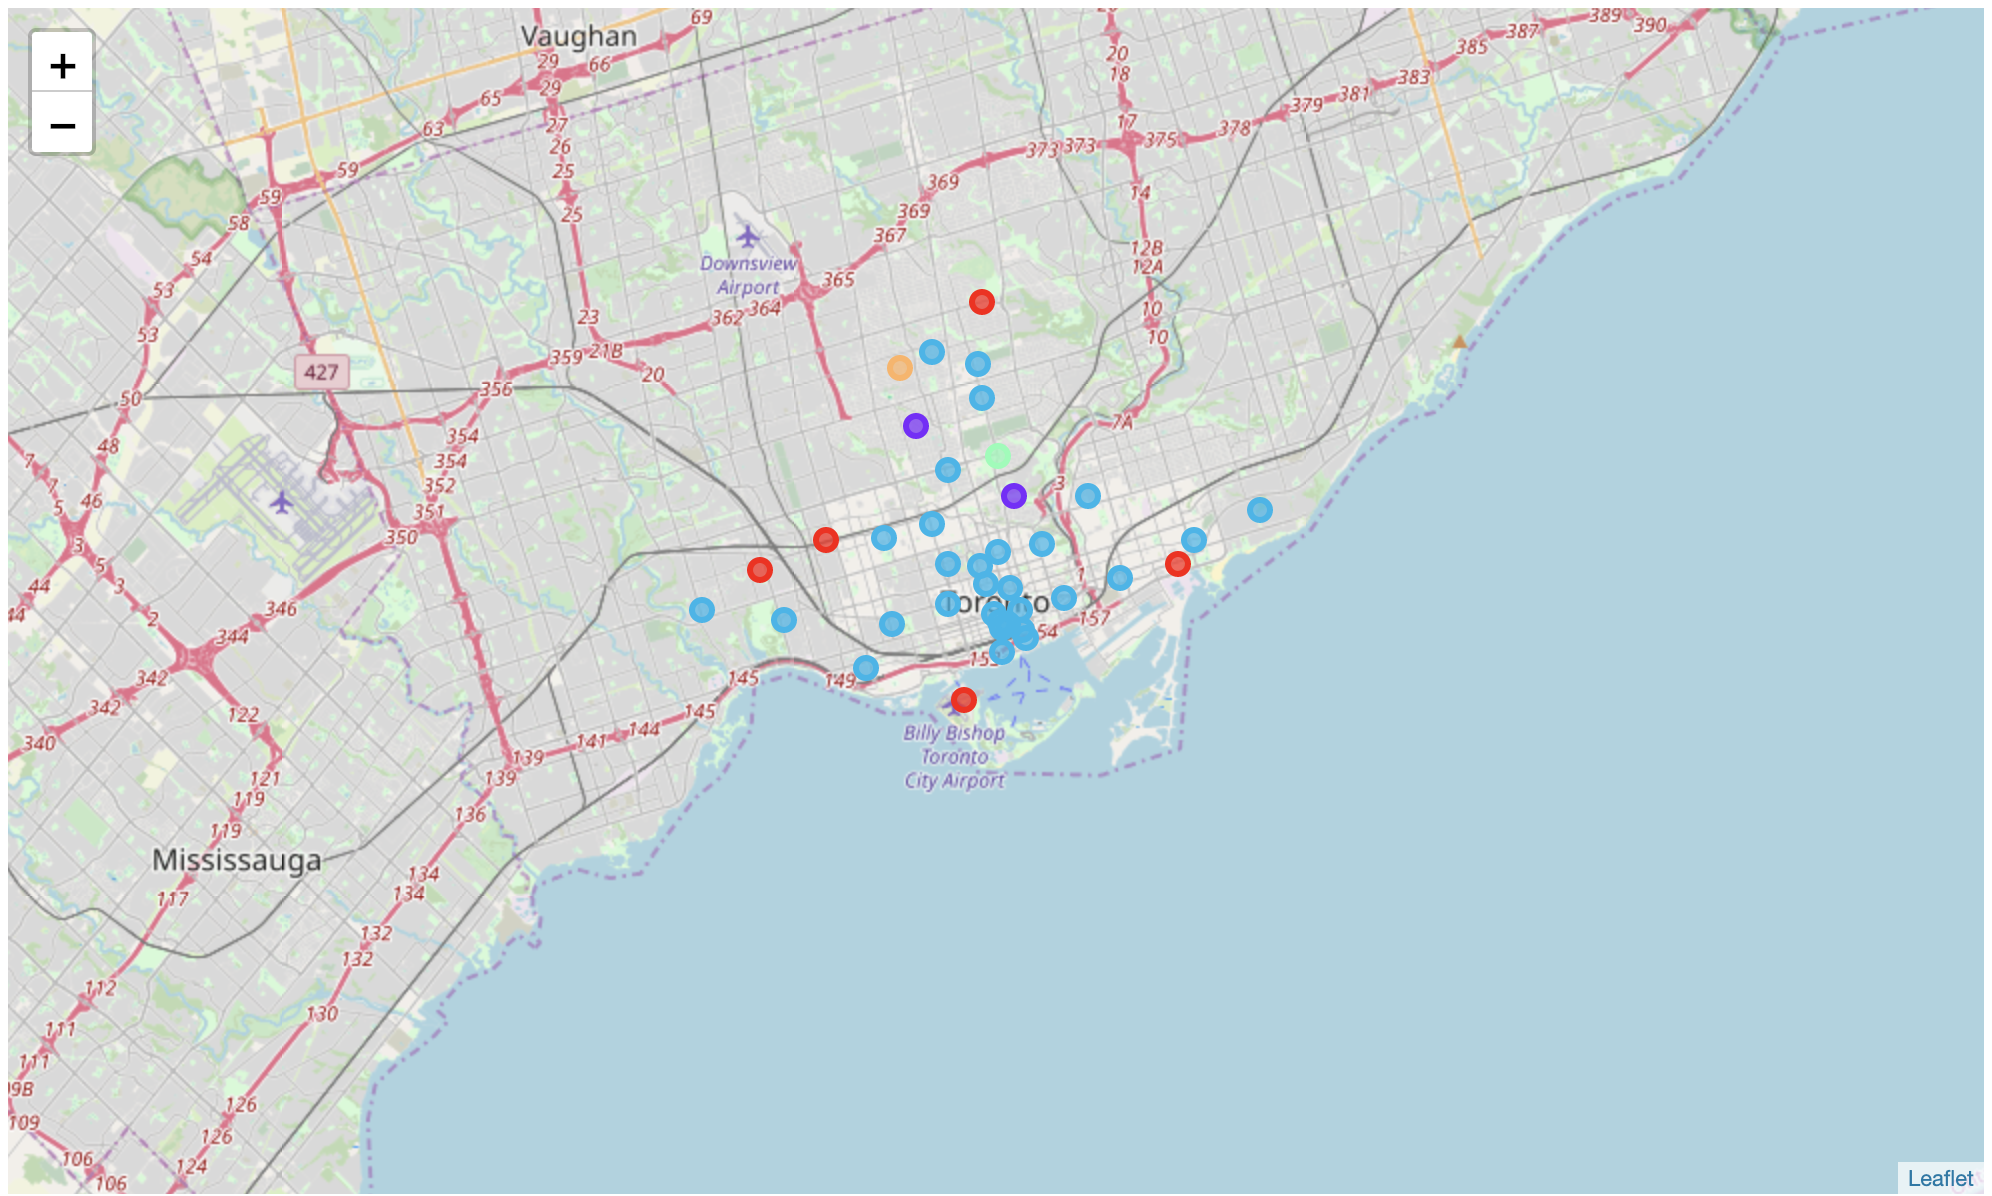

In [57]:
Image(filename = "ss2.png")